In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
#sys.path.append ('/home/angel/Documents/angel/projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
sys.path.append ('/Projects/PyPharmer_devel/') #path for angle in Groningen

import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import networkx as nx
import numpy as np
import PyPharmer as phr
import simplejson as json
from pprint import pprint
import os

# Matplotlib options
%matplotlib inline
#mt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 12

In [3]:
json_file1='../Server_Files/ZINCpharmer.json'
json_file2='../Server_Files/pharmit.json'
json_file3='../Server_Files/gold_soln_l2199_3D_H_Ch_m1_4.json'
benchmark='../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json'

## Extracting descriptors and vectors

descriptors_list={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

if 'points' in tmp_json_keys:
    
                descriptors=[]
        
                for json_object in tmp_json.get ('points'):
                    
                
                    if json_object.get ('enabled')==True:
                        name=descriptors_list[json_object.get ('name')]
                        vector=json_object.get ('vector')
                        vector_on=json_object.get ('vector_on')
                        
                        if 'vector' and 'vector_on' in json_object.keys ():
                            if vector_on ==1:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                        element['x'], element['y'],element['z']])
                                
                            if vector_on ==0:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                            
                            descriptors.append (descriptor)
                           
                        if 'vector' and not 'vector_on' in json_object.keys ():
                            
                            if vector!=None:
                                for element in vector:
                                    descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                                element['x'], element['y'],element['z']])
                            
                                
                            if vector==None:
                                vector=[0]
                                descriptor=([name,json_object.get('x'),json_object.get('y'),json_object.get('z'),
                                              vector[0],vector[0],vector[0]])
                                
                            descriptors.append (descriptor)
                                
                points=np.array (descriptors)
                pprint (points)

## Extracting descriptors and svectors 
(mistake; we need vectors)

descriptors={ 'Hydrophobic':        1.0,\
             'HydrogenAcceptor':    2.0,\
             'HydrogenDonor':       3.0,\
             'Aromatic':            4.0,\
             'NegativeIon':         5.0,\
             'PositiveIon':         6.0,\
             'InclusionSphere':     7.0,\
             'Other':               8.0,\
             'PhenylalanineAnalog': 9.0,\
             'LeuValAnalog':        10.0 \
             }

descriptors=[]
for point in ph2.get ('points'):
    if point.get ('enabled')==False:
        if 'svector' in point.keys ():
            svector=point.get ('svector')
            if svector!=None:
                name=descriptors[point.get('name')]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'), 
                    svector.get('x'),svector.get('y'),svector.get('z')])
            if svector== None:
                svector=[0]
                print ([name,point.get ('x'),point.get ('y'),point.get ('z'),point.get ('radius'),
                    svector[0],svector[0],svector[0]])

## Testing the library with multiple files

In [4]:
BCR_ABL_path= '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/'
ligands = []
for filename in os.listdir(BCR_ABL_path):
    if '.json' in filename:
        ligands.append(BCR_ABL_path+filename)
pprint (ligands)

['../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json']


<IPython.core.display.Javascript object>


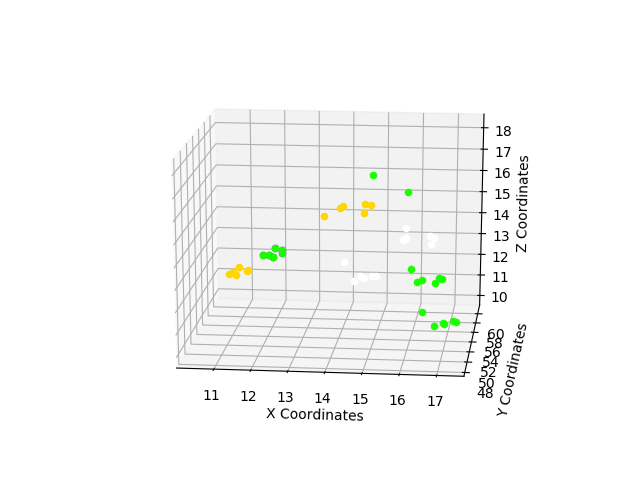

In [5]:
color_code={ 'Hydrophobic':        [0.100, 1.000, 0.000],\
             'HydrogenAcceptor':   [1.000, 0.84, 0.000],\
             'HydrogenDonor':      [1.000, 1.000, 1.000],\
             'Aromatic':           [0.627, 0.1254, 0.941],\
             'NegativeIon':        [1.00, 0.00, 0.00],\
             'PositiveIon':        [0.00, 0.00, 1.00],\
             'InclusionSphere':    [0.00, 1.00, 1.00],\
             'Other':              [0.74, 0.74, 0.74],\
             'PhenylalanineAnalog':[1.0, 1.0, 0.0],\
             'LeuValAnalog':       [1.0, 1.0, 0.0] \
             }

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
for file in ligands:
    data=phr.Descriptors (input_file=file,select='enabled')
    for point in data.points:
            color=color_code[point[0]]
            ax.scatter(point[1],point[2],point[3], color=color)
            
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')
plt.show()  

In [6]:
for file in ligands:
    data=phr.Descriptors (input_file=file,select='enabled')
data.points

array([['Aromatic', 11.781, 60.395, 12.354, 1.1, 0, 0, 0],
       ['HydrogenDonor', 14.54, 55.006, 12.227, 0.5, 0, 0, 0],
       ['HydrogenDonor', 15.995, 51.034, 14.819, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 10.749, 59.946, 11.52, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 14.232, 51.92, 16.039, 0.5, 0, 0, 0],
       ['Hydrophobic', 11.781, 60.395, 12.354, 1, 0, 0, 0],
       ['Hydrophobic', 16.366, 52.843, 12.597, 1, 0, 0, 0],
       ['Hydrophobic', 16.891, 54.608, 10.226, 1, 0, 0, 0]], dtype=object)

In [7]:
data.points[:,1]

array([11.781, 14.54, 15.995, 10.749, 14.232, 11.781, 16.366, 16.891],
      dtype=object)

In [8]:
x = make_blobs(n_samples=8, n_features=4, centers=7, cluster_std=1.6, random_state=50)

In [20]:
x

(array([[  7.69515936, -11.34104779,  -3.30528923,  -8.03246848],
        [ -0.34759371,  -4.33384716,  -3.13818631,   0.06805212],
        [ -6.39434854,   7.41360907,   2.91728783,  -1.57260674],
        [  4.70719699,  -1.60256316,  -4.06824337,  -2.36349725],
        [ -4.64406872,  10.70976881,  -0.63042131,   6.01942325],
        [  1.23842706,  -1.38649965,   7.29087197,   1.36532475],
        [ -7.41132897,  10.64215459,   9.55534789,  -1.21076078],
        [  0.11528327,  -4.98158692,  -5.34054071,   0.6640499 ]]),
 array([6, 0, 4, 2, 1, 5, 3, 0]))

<IPython.core.display.Javascript object>


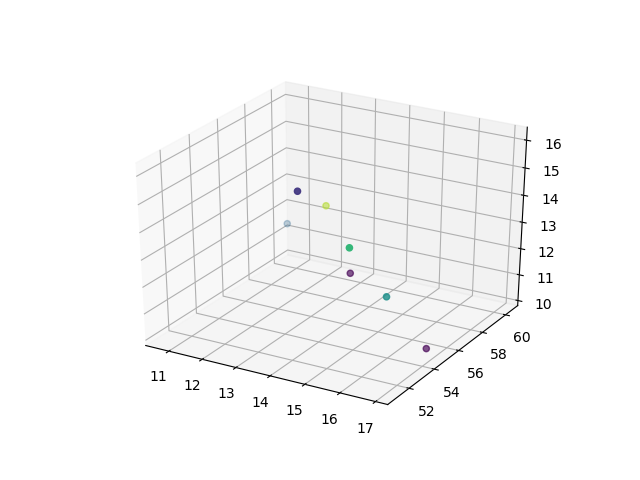

In [9]:
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(data.points[:,1], data.points[:,2],data.points[:,3], c=x[1], cmap='viridis')